# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Load dataset

In [5]:
# Load data dari GitHub (gantilah URL di bawah sesuai lokasi file CSV Anda)
url = 'https://raw.githubusercontent.com/DickySaragih/Data_science_01/refs/heads/main/employee_data.csv'
df = pd.read_csv(url)

# Data understanding

In [6]:
print("Ukuran dataset:", df.shape)
print("\nInfo dataset:")
df.info()
print("\nStatistik deskriptif:")
print(df.describe())
print("\nJumlah missing values:")
print(df.isnull().sum())


Ukuran dataset: (1470, 35)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement       

# cleaning data

In [7]:
# Hapus baris dengan nilai kosong pada kolom Attrition
df = df.dropna(subset=['Attrition'])
# Ubah tipe data Attrition menjadi integer
df['Attrition'] = df['Attrition'].astype(int)
# Hapus kolom yang tidak relevan
cols_to_drop = ['EmployeeId', 'Over18', 'StandardHours', 'EmployeeCount']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')


<ipython-input-7-2a743bc605a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'] = df['Attrition'].astype(int)
<ipython-input-7-2a743bc605a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=cols_to_drop, inplace=True, errors='ignore')


#Exploratory Data Analysis (EDA)

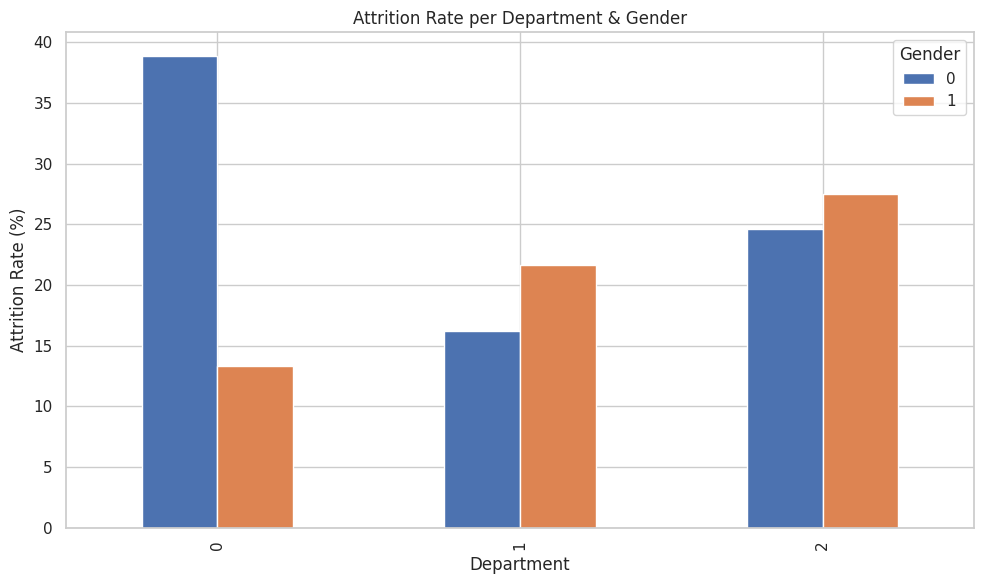

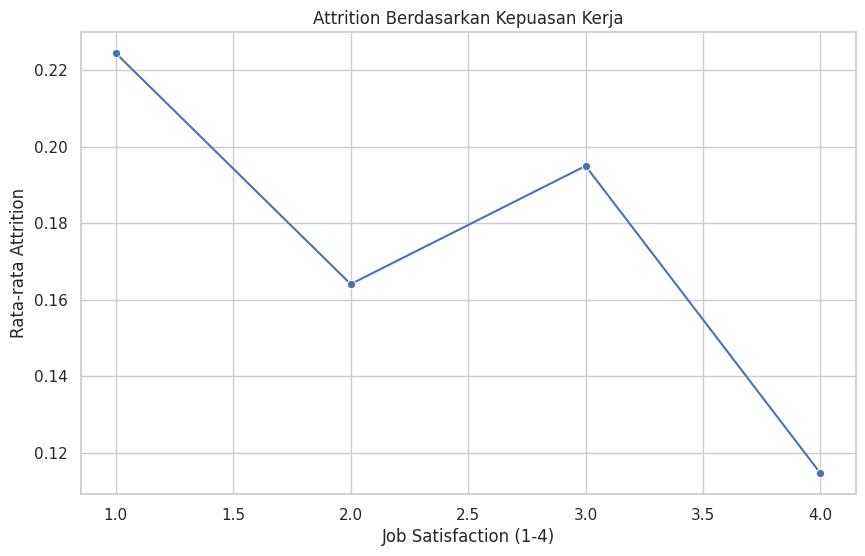

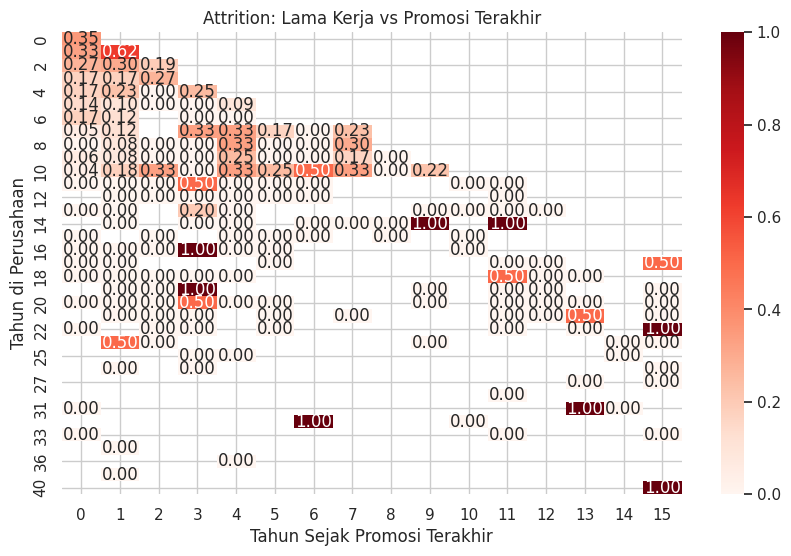

In [15]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Pertanyaan 1: Attrition berdasarkan Department, Gender, OverTime
attrition_summary = df.groupby(['Department', 'Gender', 'OverTime'])['Attrition'].agg(['count', 'sum']).reset_index()
attrition_summary['AttritionRate'] = round(attrition_summary['sum'] / attrition_summary['count'] * 100, 2)
pivot_table = attrition_summary.pivot_table(index='Department', columns='Gender', values='AttritionRate')
pivot_table.plot(kind='bar', title='Attrition Rate per Department & Gender')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.show()

# Pertanyaan 2: JobSatisfaction dan Attrition
job_sat = df.groupby('JobSatisfaction')['Attrition'].mean().reset_index()
sns.lineplot(data=job_sat, x='JobSatisfaction', y='Attrition', marker='o')
plt.title('Attrition Berdasarkan Kepuasan Kerja')
plt.xlabel('Job Satisfaction (1-4)')
plt.ylabel('Rata-rata Attrition')
plt.show()

# Pertanyaan 3: Heatmap YearsAtCompany vs YearsSinceLastPromotion vs Attrition
heatmap_data = df.groupby(['YearsAtCompany', 'YearsSinceLastPromotion'])['Attrition'].mean().unstack()
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.2f')
plt.title('Attrition: Lama Kerja vs Promosi Terakhir')
plt.xlabel('Tahun Sejak Promosi Terakhir')
plt.ylabel('Tahun di Perusahaan')
plt.show()

#### insight

insight kunci yang dapat diperoleh adalah:

1.  **Tingkat Attrition Berdasarkan Departemen, Gender, dan OverTime:**
    *   Visualisasi menunjukkan variasi tingkat *attrition* antar departemen dan gender. Perlu dicatat departemen mana dan gender mana yang memiliki tingkat *attrition* tertinggi dan terendah. Misalnya, perhatikan apakah ada departemen atau gender tertentu yang secara signifikan lebih mungkin mengalami *attrition*, terutama jika dikaitkan dengan *OverTime*. Insight ini dapat mengarah pada investigasi lebih lanjut tentang faktor-faktor spesifik di departemen/gender tersebut yang memicu *attrition*.

2.  **Hubungan Job Satisfaction dengan Attrition:**
    *   Grafik garis menunjukkan tren antara tingkat *JobSatisfaction* (Kepuasan Kerja) dan *Attrition*. Perhatikan apakah ada hubungan yang jelas, misalnya, apakah tingkat *attrition* cenderung menurun seiring dengan meningkatnya *JobSatisfaction*. Insight ini menggarisbawahi pentingnya kepuasan kerja dalam mempertahankan karyawan dan dapat menjadi dasar untuk inisiatif peningkatan moral karyawan.

3.  **Hubungan Lama Kerja dan Promosi Terakhir dengan Attrition:**
    *   *Heatmap* menampilkan rata-rata *attrition* berdasarkan kombinasi *YearsAtCompany* (Lama Kerja di Perusahaan) dan *YearsSinceLastPromotion* (Tahun Sejak Promosi Terakhir). Amati sel-sel di *heatmap* yang memiliki nilai *attrition* tinggi. Ini dapat menunjukkan bahwa karyawan yang sudah lama di perusahaan tetapi belum dipromosikan dalam jangka waktu tertentu mungkin memiliki kecenderungan *attrition* yang lebih tinggi. Insight ini relevan untuk strategi retensi yang berkaitan dengan jalur karir dan promosi.


# Data preparation

In [9]:
# Encode fitur kategorikal
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Pisahkan fitur dan target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


#### Insight

Dalam tahap data preparation untuk analisis attrition karyawan, dilakukan pembersihan data dengan menghapus baris yang memiliki missing value pada kolom target 'Attrition' demi menjaga integritas pelatihan model. Kolom target ini juga dikonversi menjadi numerik agar kompatibel dengan algoritma klasifikasi. Beberapa kolom seperti 'EmployeeId', 'Over18', 'StandardHours', dan 'EmployeeCount' dihapus karena tidak relevan atau tidak memberikan informasi prediktif. Seluruh variabel kategorikal kemudian dikodekan menggunakan Label Encoding agar bisa diproses oleh model, meskipun pendekatan ini berisiko memperkenalkan hubungan ordinal semu. Fitur numerik kemudian dinormalisasi menggunakan StandardScaler untuk memastikan kontribusi yang seimbang antar fitur. Akhirnya, data dibagi menjadi set pelatihan dan pengujian dengan rasio 80:20 menggunakan stratified sampling untuk menjaga distribusi kelas, serta random_state=42 untuk memastikan hasil dapat direproduksi.


# Modeling

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### insight
dari proses modeling, model RandomForestClassifier dilatih menggunakan data karyawan yang telah dibersihkan, diencode, dan dinormalisasi, dengan data dibagi menjadi set pelatihan dan pengujian secara stratified untuk menangani ketidakseimbangan kelas, menghasilkan prediksi *attrition* pada set pengujian.

# Model evaluasi

Akurasi Model: 0.8584905660377359

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       176
           1       1.00      0.17      0.29        36

    accuracy                           0.86       212
   macro avg       0.93      0.58      0.60       212
weighted avg       0.88      0.86      0.81       212



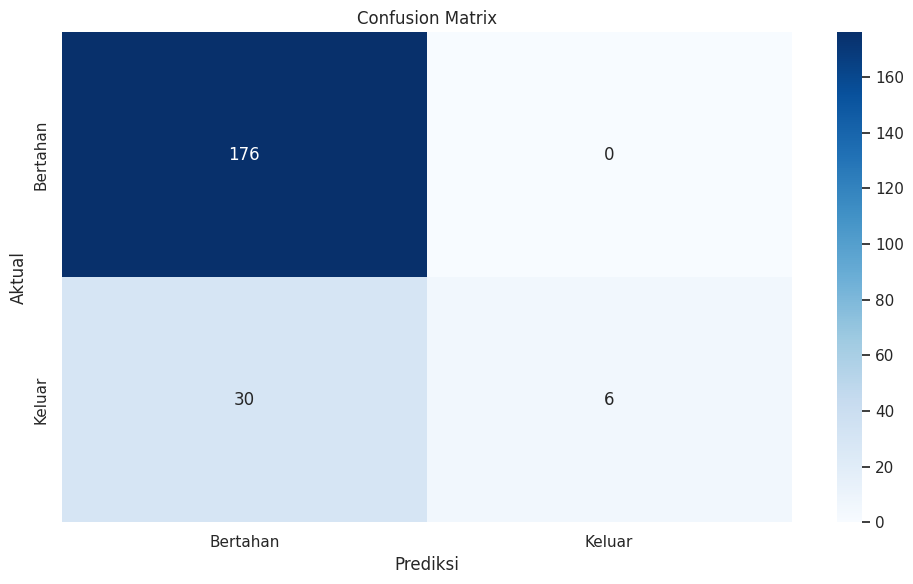

In [11]:
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bertahan', 'Keluar'], yticklabels=['Bertahan', 'Keluar'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

#### insight

Model klasifikasi menunjukkan akurasi sebesar 86,0%, yang tampaknya cukup tinggi. Namun, setelah ditelusuri lebih lanjut melalui classification report dan confusion matrix, terlihat adanya ketidakseimbangan performa pada prediksi kelas minoritas (Attrition = 1 / "Keluar"). Model berhasil memprediksi dengan baik karyawan yang bertahan (176 benar dari 176), tetapi sangat lemah dalam mendeteksi karyawan yang keluar (hanya 6 dari 36 yang benar). Ini terlihat dari nilai recall kelas 1 yang hanya 0.17 dan f1-score yang rendah (0.29).

Dengan kata lain, meskipun akurasinya tinggi, model ini belum optimal untuk memprediksi kasus 'attrition', yang sebenarnya justru merupakan fokus utama dari analisis ini. Ini menunjukkan perlunya penanganan data imbalance lebih lanjut (seperti oversampling/undersampling, atau menggunakan algoritma khusus untuk data tidak seimbang) agar model dapat lebih sensitif terhadap karyawan yang berpotensi keluar.

# visualisasi data

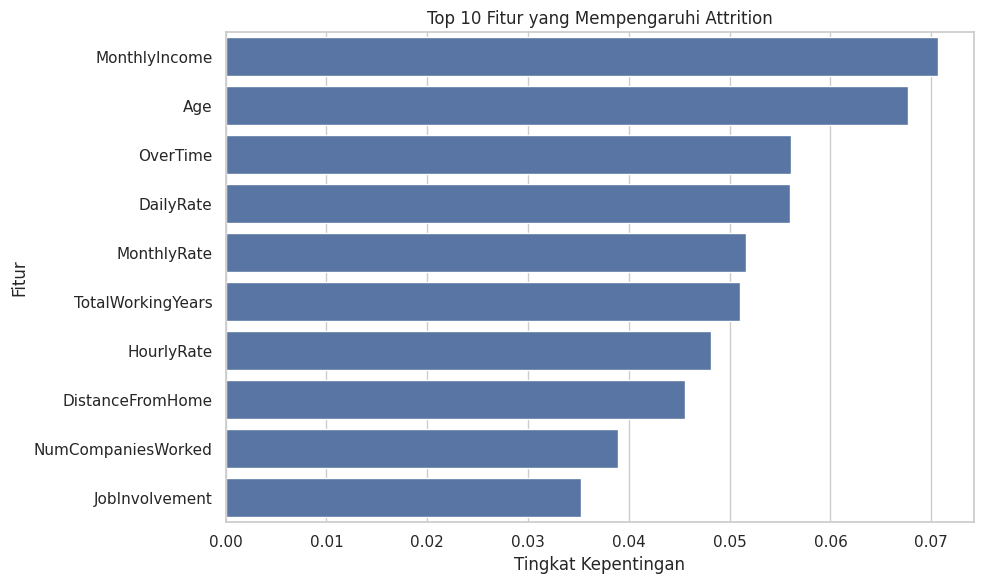

In [12]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Fitur yang Mempengaruhi Attrition')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()


#### insight


Berdasarkan grafik Top 10 Fitur yang Mempengaruhi Attrition, terlihat bahwa faktor paling signifikan yang memengaruhi kemungkinan karyawan keluar dari perusahaan adalah Monthly Income (Pendapatan Bulanan) dan Age (Usia). Ini menunjukkan bahwa karyawan dengan gaji rendah dan usia tertentu lebih rentan mengalami attrition. Faktor berikutnya yang juga berpengaruh besar adalah OverTime, yang menandakan bahwa beban kerja lembur berkaitan erat dengan keputusan karyawan untuk keluar. Selain itu, DailyRate, MonthlyRate, dan TotalWorkingYears juga berkontribusi signifikan, mengindikasikan bahwa faktor kompensasi dan pengalaman kerja turut memengaruhi retensi. Faktor seperti DistanceFromHome dan JobInvolvement pun tak kalah penting, memperlihatkan bahwa keterlibatan dalam pekerjaan dan jarak ke kantor dapat memengaruhi loyalitas karyawan terhadap perusahaan. Insight ini dapat dijadikan dasar strategi retensi, terutama dengan meninjau ulang kebijakan kompensasi dan manajemen beban kerja.